## Import data
Load data from .csv files, each into their own `pd.DataFrame`

In [29]:
import pandas as pd

#fields that we are interested in
load_fields = ["timestamp", "open", "high", "low", "close", "adjusted_close"]
fields = ["open", "high", "low", "close"]
stock_names = ["MSFT", "GOOGL", "AAPL", "FB", "AMZN"]

stocks = dict()
for stock in stock_names:
    #reverse dataframes to put them in chronological order
    df = pd.read_csv("./daily_adjusted_" + stock + ".csv")[load_fields]
    df.iloc[:] = df.iloc[::-1].values
    stocks[stock] = df

In [30]:
#samples before preprocessing
for k, v in stocks.items():
    print(k)
    print(v.head().append(v.tail()))
    print("\n")

MSFT
       timestamp    open    high      low   close  adjusted_close
0     2000-01-03  117.37  118.62  112.000  116.56         38.4516
1     2000-01-04  113.56  117.12  112.250  112.62         37.1519
2     2000-01-05  111.12  116.37  109.370  113.81         37.5445
3     2000-01-06  112.19  113.87  108.370  110.00         36.2876
4     2000-01-07  108.62  112.25  107.310  111.44         36.7626
4659  2018-07-11  101.15  102.34  101.100  101.98        101.9800
4660  2018-07-12  102.77  104.41  102.730  104.19        104.1900
4661  2018-07-13  104.37  105.60  104.090  105.43        105.4300
4662  2018-07-16  105.40  105.82  104.515  104.91        104.9100
4663  2018-07-17  104.61  106.50  104.320  105.95        105.9500


GOOGL
       timestamp     open     high      low     close  adjusted_close
0     2004-08-19   100.01   104.06    95.96   100.335         50.3228
1     2004-08-20   101.01   109.08   100.50   108.310         54.3227
2     2004-08-23   110.76   113.48   109.05   109.4

## Sanity checks
Specifically, check for NaNs and 0 values (as hopefully, none of our stocks have ever hit 0..)

In [31]:
for k, v in stocks.items():
    nans = "yes" if v.isnull().values.any() else "no"
    print("Are there NaNs in " + k + "?: " + nans)
    
for k, v in stocks.items():
    zeros = "yes" if (v == 0).values.any() else "no"
    print("Are there zero values in " + k + "?: " + zeros)

Are there NaNs in MSFT?: no
Are there NaNs in GOOGL?: no
Are there NaNs in AAPL?: no
Are there NaNs in FB?: no
Are there NaNs in AMZN?: no
Are there zero values in MSFT?: no
Are there zero values in GOOGL?: no
Are there zero values in AAPL?: no
Are there zero values in FB?: no
Are there zero values in AMZN?: no


## Initial preprocessing
Open, high, and low need to be converted to *similar* units to adjusted_close; otherwise, there'll be a large value gap wherever a stock split occurs.

In [32]:
#replace open, high, and low columns with their adjusted counterparts
#these new columns should be in similar units as adjusted_close
#replace close with adjusted_close
#from now on, open/high/low/close will refer to adjusted data
for stock_name, df in stocks.items():
    ratio = df["adjusted_close"] / df["close"]
    #replace old OHL with adjusted OHL
    df["open"] = df["open"] * ratio
    df["high"] = df["high"] * ratio
    df["low"] = df["low"] * ratio
    #replace close with adjusted_close
    df["close"] = df["adjusted_close"]
    #drop adjusted_close
    stocks[stock_name] = df.drop(columns=["adjusted_close"])

## Data exploration

### Data samples

In [33]:
for k, v in stocks.items():
    print(k)
    print(v.head().append(v.tail()))
    print("\n")

MSFT
       timestamp        open        high         low     close
0     2000-01-03   38.718808   39.131167   36.947316   38.4516
1     2000-01-04   37.461994   38.636393   37.029842   37.1519
2     2000-01-05   36.657103   38.389012   36.079799   37.5445
3     2000-01-06   37.010053   37.564264   35.749884   36.2876
4     2000-01-07   35.832319   37.029808   35.400167   36.7626
4659  2018-07-11  101.150000  102.340000  101.100000  101.9800
4660  2018-07-12  102.770000  104.410000  102.730000  104.1900
4661  2018-07-13  104.370000  105.600000  104.090000  105.4300
4662  2018-07-16  105.400000  105.820000  104.515000  104.9100
4663  2018-07-17  104.610000  106.500000  104.320000  105.9500


GOOGL
       timestamp         open         high          low      close
0     2004-08-19    50.159797    52.191066    48.128528    50.3228
1     2004-08-20    50.661397    54.708892    50.405608    54.3227
2     2004-08-23    55.551506    56.915718    54.693858    54.8694
3     2004-08-24    55.792

### Dataset Summaries

In [34]:
all_closes = dict()

for k, v in stocks.items():
    print(k)
    print(v.describe().loc[["mean", "std", "min", "max"]])
    print("\n")
    all_closes[k] = v["close"]

all_closes = pd.DataFrame(all_closes)
print(all_closes.describe())

MSFT
            open        high         low       close
mean   29.964056   30.266950   29.666246   29.970813
std    18.092970   18.209090   17.967261   18.101677
min    12.046627   12.379566   11.785156   12.007000
max   105.400000  106.500000  104.515000  105.950000


GOOGL
             open         high          low        close
mean   424.492157   428.257164   420.373734   424.389694
std    274.430213   276.311424   272.419436   274.516655
min     49.698452    51.027478    48.128528    50.159800
max   1203.810000  1218.760000  1195.290000  1213.630000


AAPL
            open        high         low       close
mean   45.085125   45.499174   44.645747   45.082381
std    49.843363   50.220224   49.466000   49.853977
min     0.825120    0.837876    0.807991    0.833400
max   194.140000  194.200000  192.360000  193.980000


FB
            open        high         low       close
mean   94.172600   95.139042   93.149697   94.199641
std    51.584597   51.929922   51.246492   51.664708
m

### Complete price history

In [35]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.finance import candlestick2_ohlc, candlestick_ohlc
import datetime

import matplotlib.ticker as ticker

def relative_change(from_val, to_val):
    return (to_val - from_val) / from_val

def plot_complete_history(stock_name):
    stock_df = stocks[stock_name]
    plt.title(stock_name + " Closing Prices")
    datetimes = [datetime.datetime.strptime(date, "%Y-%m-%d") for date in stock_df["timestamp"]]
    datenums = [mdates.date2num(date) for date in datetimes]
    plt.plot(datenums, stock_df["close"])
    plt.ylabel("Price ($)")
    plt.xticks(rotation=45, ha="right")
    myFmt = mdates.DateFormatter("%Y-%m-%d")
    plt.gca().xaxis.set_major_formatter(myFmt)

def plot_close_differences(stock_name):
    stock_closes = stocks[stock_name]["close"]
    stock_diff = pd.Series(relative_change(stock_closes[:-1].values, stock_closes[1:].values) * 100)
    #clip 1% off to make plot readable
    stock_diff = stock_diff[(stock_diff > stock_diff.quantile(0.01)) & (stock_diff < stock_diff.quantile(0.99))]
    
    plt.tight_layout()
    stock_diff.plot.hist(bins=30)
    plt.title("{} daily price changes".format(stock_name))
    plt.xlabel("Change per day (%)")
    plt.axvline(stock_diff.mean(), color="black", linestyle="dashed", label = stock_diff.mean())
    plt.legend(["Mean ({:.4f}%)".format(stock_diff.mean())])
    print("{} mean % change per day: {}".format(stock_name, stock_diff.mean()))

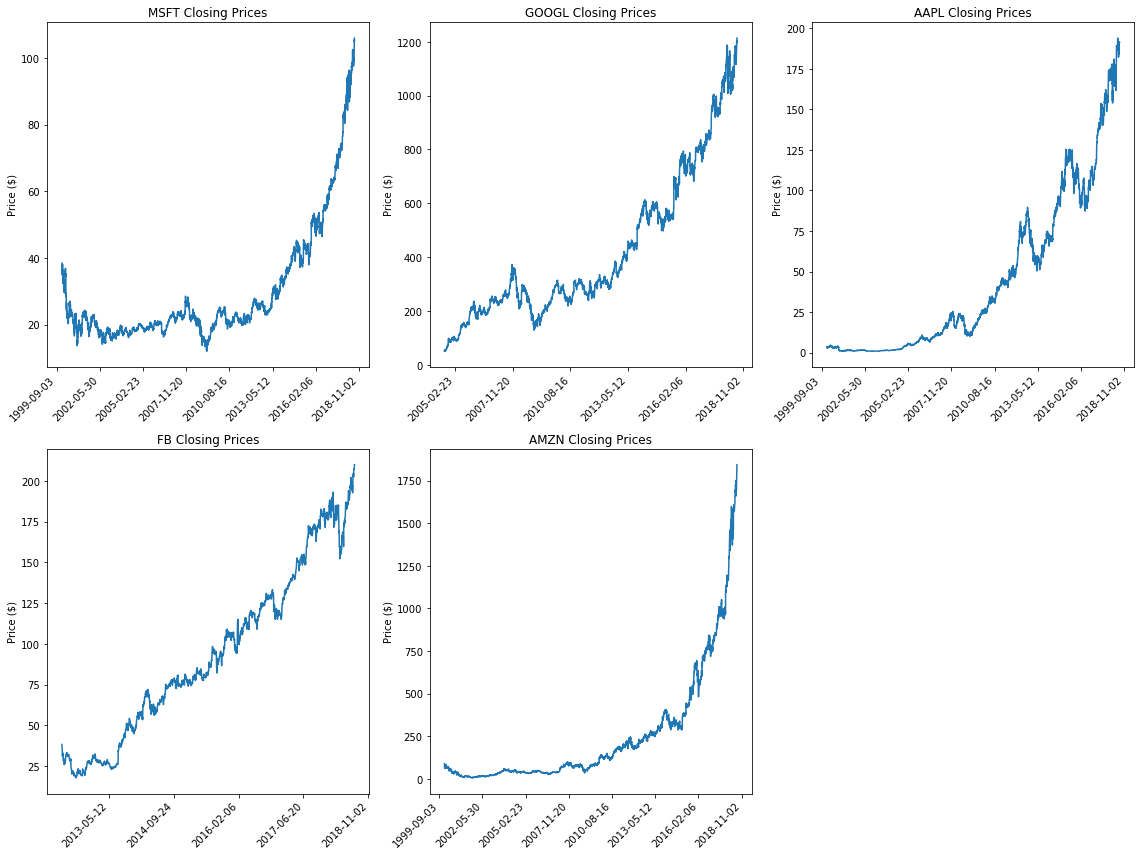

In [36]:
plt.figure(figsize=(16, 12))

for i, stock_name in enumerate(stocks.keys()):
    plt.subplot(2, 3, i + 1)
    
    plt.tight_layout()
    plot_complete_history(stock_name)

plt.savefig("figs/closing-history.png")

### Distribution of price changes

MSFT mean % change per day: 0.03873557481653503
GOOGL mean % change per day: 0.09091347846218954
AAPL mean % change per day: 0.12296396556959718
FB mean % change per day: 0.11012391554884027
AMZN mean % change per day: 0.08057509138656799


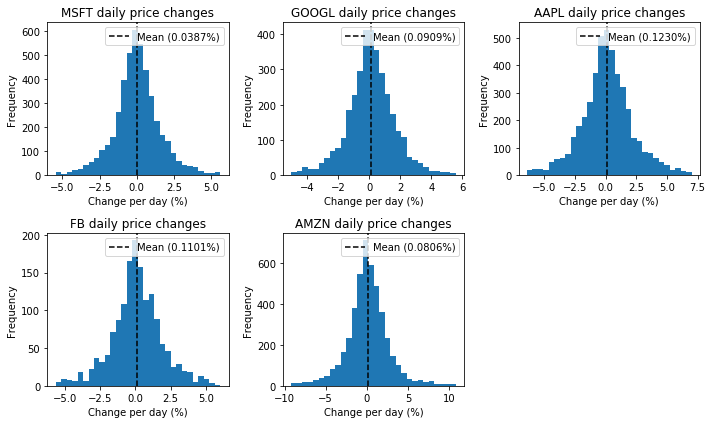

In [37]:
plt.figure(figsize=(10, 6))

for i, stock_name in enumerate(stocks.keys()):
    plt.subplot(2, 3, i + 1)
    plot_close_differences(stock_name)

plt.savefig("figs/price-change-distribution.png")

### Recent (last 30 days) candlestick charts

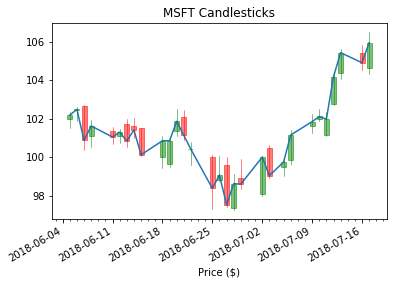

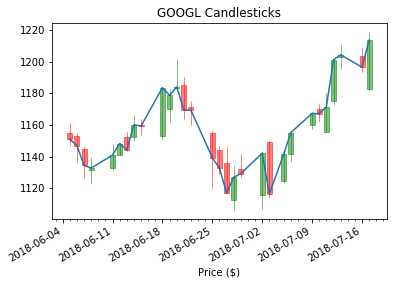

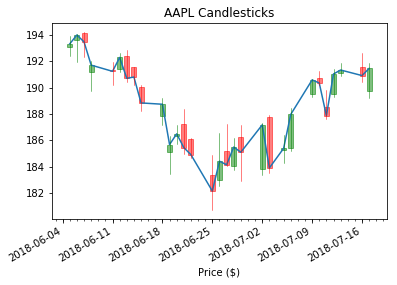

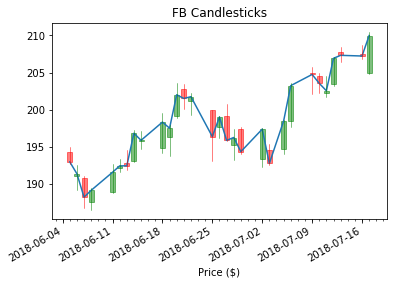

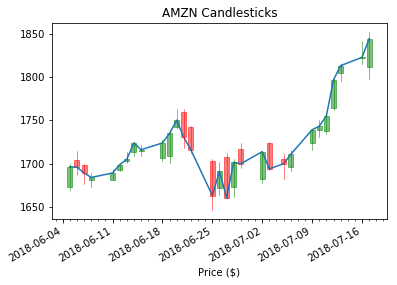

In [38]:
def plot_prices(stock_name, df):
    #major = mdates.MonthLocator()
    major = mdates.WeekdayLocator(byweekday=mdates.MO)
    minor = mdates.DayLocator()
    fmt = mdates.DateFormatter("%Y-%m-%d")
    
    #convert yyyy-mm-dd to datetimes
    datetimes = [datetime.datetime.strptime(date, "%Y-%m-%d") for date in df["timestamp"]]
    datenums = [mdates.date2num(date) for date in datetimes]
    #build quotes for candlestick_ohlc
    quotes = zip(datenums, df["open"], df["high"], df["low"], df["close"])
        
    fig, ax = plt.subplots()
    
    plt.title(stock_name + " Candlesticks")
    plt.xlabel("Price ($)")
    plt.plot(datetimes, df["close"])
    
    candlestick_ohlc(ax, quotes, width=0.7, colorup="g", colordown="r", alpha = 0.5)
    
    ax.xaxis.set_major_locator(major)
    ax.xaxis.set_major_formatter(fmt)
    ax.xaxis.set_minor_locator(minor)
    
    fig.autofmt_xdate()
    #fig.tight_layout()
    
    plt.savefig("figs/" + stock_name + "-candlesticks.png")

for i, (stock_name, df) in enumerate(stocks.items()):
    #plt.subplot(3, 2, i + 1)
    #plt.figure()
    #plot last 30 days
    df = df.tail(30)
    plot_prices(stock_name, df)


## Generate training input/output
* input: flattened windows of OHLC `relative_change`s to the current day
* output: OHLC `relative_change` from the current day to the next day

In [39]:
import numpy as np
import math

np.random.seed(12)

#data-only fields
fields = ["open", "high", "low", "close"]

In [40]:
#creates an input window for the given day
def get_window(data, i, size, sep):
    window = []
    
    for n in range(size):
        #calculate previous row index to compare to
        days_before = math.floor(sep ** (n + 1))
        
        #append relative change of OHLC compared to data[i]
        window.append(relative_change(data[i - days_before], data[i]))
    
    #flatten [[OHLC][OHLC]] into [OHLCOHLC]
    window = np.array(window).flatten()
    
    return window

#generates input windows (X) and output price change ratios (y) from the given dataframe
def generate_xy(df, window_size, window_base):
    X = []
    y = []
    #only get fields we're interested in
    data = df[fields].values
    
    #iterate from window_span to end - 1 (since the last price change requires days[t+1])
    for i in range(window_span, len(data) - 1):
        #build window and append to X
        X.append(get_window(data, i, window_size, window_base))
        #append tomorrow's price difference y
        y.append(relative_change(data[i], data[i+1]))
    return (X, y)
    

In [41]:
#number of OHLC changes to include in the window
window_size = 30

#range of past days to cover
window_span = 300

#calculate exponential base to use for distance calculation
#more entries closer to the day being predicted
window_base = np.power(window_span, 1.0 / window_size)

#note that some early values may be duplicated depending on the size and span chosen :(
days = [-np.floor(window_base ** x) for x in range(1, window_size + 1)]
print("Window indexes before current day: {}\n".format(days))

#which stocks to include in the training dataset
train_stocks = stock_names[:-1]

#stocks that will be completly held out during training
test_stocks = stock_names[-1:]

print("training stocks: {}".format(train_stocks))
print("testing stocks: {}\n".format(test_stocks))

x_train = []
y_train = []

#loop through each stock in train and generate Xs (OHLC windows) and ys (next day's OHLC)
for stock in train_stocks:
    print("Generating data for " + stock)
    X, y = generate_xy(stocks[stock], window_size, window_base)
    x_train = x_train + X
    y_train = y_train + y

x_train = np.array(x_train)
y_train = np.array(y_train)
print("{} entries in training set\n".format(len(x_train)))

#output a sample of the input windows
print(x_train[:10])

Window indexes before current day: [-1.0, -1.0, -1.0, -2.0, -2.0, -3.0, -3.0, -4.0, -5.0, -6.0, -8.0, -9.0, -11.0, -14.0, -17.0, -20.0, -25.0, -30.0, -37.0, -44.0, -54.0, -65.0, -79.0, -95.0, -115.0, -140.0, -169.0, -205.0, -248.0, -299.0]

training stocks: ['MSFT', 'GOOGL', 'AAPL', 'FB']
testing stocks: ['AMZN']

Generating data for MSFT
Generating data for GOOGL
Generating data for AAPL
Generating data for FB
13176 entries in training set

[[-0.04570923 -0.00454236  0.00716951 ..., -0.53253045 -0.53674805
  -0.51882407]
 [ 0.00593863  0.00913121  0.00365264 ..., -0.52522199 -0.52281319
  -0.52552571]
 [ 0.05352173  0.01502062  0.02509857 ..., -0.50750989 -0.50632227
  -0.5119104 ]
 ..., 
 [-0.03234186  0.01521404  0.01507815 ..., -0.5023013  -0.50246275
  -0.49911852]
 [ 0.08662912  0.05438341  0.07683106 ..., -0.49973672 -0.48576834
  -0.49612474]
 [ 0.03986411  0.0087743   0.02170155 ..., -0.50643723 -0.50281825
  -0.51383175]]


## Load a previously trained model

*When loading model, make sure that `window_size` and `window_span` above match the first 2 numbers in the filename, respectively*

In [42]:
import keras
load_path = "models/model-30-300-0.000249-20180809-000709.h5"
model = keras.models.load_model(load_path)

## Or, define model creation function

In [43]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras import optimizers

#thanks, https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
def create_model(num_hidden = 2, hidden_size = 100, dropout = 0.0, activation = "relu", final_acti="tanh", lr=0.001):
    model = Sequential()
    
    #add hidden layers
    for i in range(num_hidden):
        #specify input shape for first layer
        if i == 0:
            model.add(Dense(units=hidden_size, input_shape = (window_size * len(fields),), activation = activation))
        else:
            model.add(Dense(units=hidden_size, activation = activation))
        
        #add dropout layers if dropout rate is greater than 0
        if dropout > 0.0:
            model.add(Dropout(dropout))
    
    #add output layer, using a separate activation to avoid exploding values from relu, etc
    #assuming activations that clamp to -1..1, this should work fine
    #as long as the absolute value of 1-day changes are not close to, or above 100%
    model.add(Dense(len(fields), activation = final_acti))
    
    #create optimizer and compile model
    opt = optimizers.Adam(lr)
    model.compile(optimizer = opt, loss = "mean_squared_error")
    
    return model

#initial model creation/training
#model = create_model(lr = 0.01)
#model.fit(x_train, y_train, batch_size = 1024, epochs=1000)

## And perform a hyperparameter search

In [44]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
import keras.backend as K

#thanks, https://keras.io/scikit-learn-api/

#thanks, https://stackoverflow.com/questions/44826458/gridsearch-in-keras-tensorflow-resulting-in-resource-exhausted
#just to avoid potentially hogging computation resources
K.clear_session()

estimator = KerasRegressor(build_fn = create_model, epochs = 1000, batch_size = 1024, verbose = 0)

#hyperparameter options
param_grid = dict(
    num_hidden = [1, 2, 4],
    hidden_size = [50, 100, 200],
    #lr = [0.01, 0.001, 0.0001],
    activation = ["relu", "softsign", "tanh", "elu"],
    dropout = [0.0, 0.1, 0.2, 0.4],
)

#use KFold cv with 3 splits, and shuffle (since our data is composed of multiple stocks)
cv = KFold(n_splits = 3, shuffle = True)

#using randomizedsearchcv to facilitate a quicker parameter grid adjustement - train - evaluate cycle
search = RandomizedSearchCV(estimator=estimator, param_distributions=param_grid, cv=cv, n_jobs = 1, n_iter=10, verbose=100)

search_result = search.fit(x_train, y_train)

print("Best score: {}".format(search_result.best_score_))

#save best model with timestamp, mean cv loss, and window size/span in filename
model_timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
filepath="models/model-{}-{}-{:.6f}-{}.h5".format(window_size,
                                                  window_span,
                                                  -search_result.best_score_,  #negate because "score", not loss
                                                  model_timestamp)
search_result.best_estimator_.model.save(filepath)
print("Best model saved to {}".format(filepath))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] num_hidden=2, hidden_size=100, dropout=0.0, activation=softsign .
[CV]  num_hidden=2, hidden_size=100, dropout=0.0, activation=softsign, score=-0.0002859472174673275, total=   3.4s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s
[CV] num_hidden=2, hidden_size=100, dropout=0.0, activation=softsign .
[CV]  num_hidden=2, hidden_size=100, dropout=0.0, activation=softsign, score=-0.00026981433090551984, total=   3.6s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.1s remaining:    0.0s
[CV] num_hidden=2, hidden_size=100, dropout=0.0, activation=softsign .
[CV]  num_hidden=2, hidden_size=100, dropout=0.0, activation=softsign, score=-0.0002752830460635803, total=   3.4s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.7s remaining:    0.0s
[CV] num_hidden=1, hidden_size=100, dropout=0.0, activation=relu .....
[CV]  num_hidden=1, hidden_size=100, dropout=0.0, activation=relu, sc

In [45]:
#display search results
means = search_result.cv_results_['mean_test_score']
stds = search_result.cv_results_['std_test_score']
params = search_result.cv_results_['params']
for mean, stdev, param in sorted(zip(means, stds, params), reverse=True):
    print("%f (%f) with: %r" % (mean, stdev, param))
    

-0.000252 (0.000002) with: {'num_hidden': 2, 'hidden_size': 100, 'dropout': 0.1, 'activation': 'softsign'}
-0.000258 (0.000004) with: {'num_hidden': 4, 'hidden_size': 50, 'dropout': 0.1, 'activation': 'tanh'}
-0.000263 (0.000002) with: {'num_hidden': 2, 'hidden_size': 50, 'dropout': 0.4, 'activation': 'elu'}
-0.000264 (0.000002) with: {'num_hidden': 4, 'hidden_size': 50, 'dropout': 0.0, 'activation': 'softsign'}
-0.000266 (0.000003) with: {'num_hidden': 4, 'hidden_size': 100, 'dropout': 0.2, 'activation': 'relu'}
-0.000270 (0.000012) with: {'num_hidden': 1, 'hidden_size': 200, 'dropout': 0.2, 'activation': 'elu'}
-0.000277 (0.000007) with: {'num_hidden': 2, 'hidden_size': 100, 'dropout': 0.0, 'activation': 'softsign'}
-0.000287 (0.000004) with: {'num_hidden': 1, 'hidden_size': 50, 'dropout': 0.4, 'activation': 'tanh'}
-0.000288 (0.000003) with: {'num_hidden': 1, 'hidden_size': 100, 'dropout': 0.0, 'activation': 'softsign'}
-0.000321 (0.000001) with: {'num_hidden': 1, 'hidden_size': 100

In [46]:
#extract the best model from the hyperparameter search
model = search.best_estimator_.model

## Evaluation

In [47]:
#simulate (continuous predictions for num_steps days) using the model
def simulate_model(model, start, num_steps, data):
    #remove prices after "start", this is where our predictions will begin
    sim_data = data[:start]
    
    for i in range(num_steps):
        #grab input window for the last day in our simulation data
        input_window = get_window(sim_data, len(sim_data) - 1, window_size, window_base)
        
        #predict the relative change in price
        pred_change = model.predict([[input_window]])
        #extrapolate the next day's price from the last day in our simulation data
        pred_ohlc = sim_data[-1] * (1 + pred_change)
        
        #add to our data for further predictions
        sim_data.append(pred_ohlc.squeeze()) #remove batch dimension
        
    return sim_data

#Gaussian random walk
def simulate_random_walk(start, num_steps, data):
    sim_data = data[:start]
    
    #calculate day-to-day price differences
    differences = [sim_data[i + 1] - sim_data[i] for i in range(len(sim_data) - 1)]
    
    #calc mean and std of price differences for Gaussian random walk
    diff_mean = np.mean(differences)
    diff_std = np.std(differences)
    
    for i in range(num_steps):
        prev_ohlc = sim_data[-1]
        new_ohlc = prev_ohlc + np.random.normal(diff_mean, diff_std)
        sim_data.append(new_ohlc)
        
    return sim_data

In [48]:
def absolute_percentage_error(target, pred):
    return abs(pred - target) / target * 100

#earlier in development, this was used to create its own figures instead of subplots,
#so the paramater 'labels' was left in
def plot_trial(data, title, labels, trial_length):
    plt.title(title)
    
    lines = []
    for i, datum in enumerate(data):
        line, = plt.plot(range(-trial_length, trial_length + 1), datum, zorder=-i)
        lines.append(line)
    
    #prediction point assumed to be in the middle of the data
    plt.axvline(0, color="black", linestyle="dashed")
    #plt.tight_layout()
    plt.tight_layout(rect=[0.05, 0.03, 1, 1])
    #plt.xlabel("Prediction day")
    #plt.ylabel("Price ($)")
    #plt.legend(labels)
    return lines

Run multiple trials: `num_trials` trials per `trial_length` per stock.  MAPE for both the model and random walk will be averaged over each (`trial_length`, stock) combination.

Testing each (stock, length) combination with 100 trials each:
| Trial | Model | Random walk |
| --- | --- | --- |
| MSFT 7-day | 3.24% | 4.79% |
| MSFT 30-day | 6.64% | 10.64% |
| MSFT 100-day | 14.20% | 18.47% |
| GOOGL 7-day | 3.66% | 4.55% |
| GOOGL 30-day | 9.21% | 10.50% |
| GOOGL 100-day | 14.99% | 15.66% |
| AAPL 7-day | 4.06% | 6.95% |
| AAPL 30-day | 7.81% | 16.42% |
| AAPL 100-day | 18.51% | 28.70% |
| FB 7-day | 2.79% | 4.39% |
| FB 30-day | 7.05% | 8.45% |
| FB 100-day | 6.81% | 12.46% |
| AMZN 7-day | 5.04% | 8.79% |
| AMZN 30-day | 10.85% | 18.80% |
| AMZN 100-day | 21.19% | 42.19% |


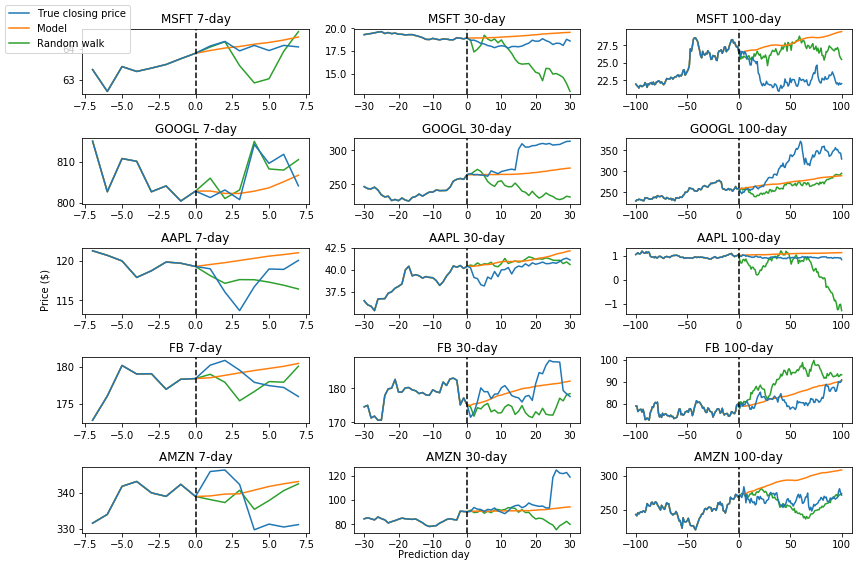

In [49]:
#define trial lengths in days
trial_lengths = [7, 30, 100]

#number of trials to average
num_trials = 100
show_plots = True

print("Testing each (stock, length) combination with {} trials each:".format(num_trials))
#markdown table
print("| Trial | Model | Random walk |")
print("| --- | --- | --- |")

fig = plt.figure(figsize=(12, 8))
#thanks, https://stackoverflow.com/questions/6963035/pyplot-axes-labels-for-subplots
fig.text(0.5,0.04, "Prediction day", ha="center", va="center")
fig.text(0.05,0.5, "Price ($)", ha="center", va="center", rotation=90)

subplot = 0
for i_stock, stock in enumerate(stock_names):
    for i_trial_length, trial_length in enumerate(trial_lengths):
        model_apes = []
        walk_apes = []
        
        for i in range(num_trials):
            trial_data_init = list(stocks[stock][fields].values)
            #start at a random index up to length - trial length
            #start at index 2 minimum so we have a previous price to base future prices on,
            #and so we can calculate random walk mean/std price differences
            #end at -1 so ape can be calculated (using data[t+1])
            trial_start_index = np.random.randint(window_span, len(trial_data_init) - trial_length - 1)

            model_data_out = simulate_model(model, trial_start_index, trial_length, trial_data_init)
            walk_data_out = simulate_random_walk(trial_start_index, trial_length, trial_data_init)

            close_orig = [x[3] for x in trial_data_init][trial_start_index - 1:trial_start_index + trial_length]
            close_orig_plot = [x[3] for x in trial_data_init][trial_start_index - 1 - trial_length:trial_start_index + trial_length]
            
            #grab close predictions
            model_closes = [x[3] for x in model_data_out][trial_start_index - 1:trial_start_index + trial_length]
            model_closes_plot = [x[3] for x in model_data_out][trial_start_index - 1 - trial_length:trial_start_index + trial_length]
            walk_closes = [x[3] for x in walk_data_out][trial_start_index - 1:trial_start_index + trial_length]
            walk_closes_plot = [x[3] for x in walk_data_out][trial_start_index - 1 - trial_length:trial_start_index + trial_length]
            
            #calculate absolute percentage errors
            model_apes.append(absolute_percentage_error(close_orig[-1], model_closes[-1]))
            walk_apes.append(absolute_percentage_error(close_orig[-1], walk_closes[-1]))
            
            #plot one sample trial for each length/stock combination
            if i == 0:
                plt.subplot(len(stock_names), len(trial_lengths), subplot + 1)
                
                subplot += 1
                #plot predictions and ground truth
                lines = plot_trial([close_orig_plot, model_closes_plot, walk_closes_plot],
                            "{} {}-day".format(stock, trial_length),
                            ["True closing price", "Model", "Random walk"],
                            trial_length
                          )
                #create legend
                #thanks, https://stackoverflow.com/questions/9834452/how-do-i-make-a-single-legend-for-many-subplots-with-matplotlib
                if i_stock == len(stock_names) - 1 and i_trial_length == len(trial_lengths) - 1:
                    plt.figlegend(lines, ["True closing price", "Model", "Random walk"], loc="upper left")
        #calculate and output MAPEs
        model_mape = np.mean(model_apes)
        walk_mape = np.mean(walk_apes)
        print("| {} {}-day | {:.2f}% | {:.2f}% |".format(
            stock,
            trial_length,
            model_mape,
            walk_mape,
        ))

plt.savefig("figs/prediction-samples.png")